In [1]:
import sys
from collections import OrderedDict
import pandas as pd
import numpy as np
# Load libraries
import pandas
import pandas as pd
#from pandas.plotting import scatter_matrix <-- deprecated
from pandas.tools.plotting import scatter_matrix

In [2]:
fname = 'BigData\\BigData.xlsx'
dataset = pandas.read_excel(fname)

# preprocessing
dataset = dataset.replace('.', np.nan)
dataset.iloc[:, 6:] = dataset.iloc[:, 6:].apply(lambda row: row.astype(float))

In [3]:

columnsListB = dataset.columns.values.tolist()
depVar = dataset['Disease Incidence'].values

# Three cases for independent vars: TAV, Rain fall, RH
st1 = columnsListB.index('pcpn_JunW1')
ed1 = columnsListB.index('pcpn_SeptW4')
st2 = columnsListB.index('TAV_JunW1')
ed2 = columnsListB.index('TAV_SeptW4')
st3 = columnsListB.index('RAV_JunW1')
ed3 = columnsListB.index('RAV_SeptW4')
indepVarRain = dataset.iloc[:, st1:ed1+1]
indepVarTAV = dataset.iloc[:, st2:ed2+1]
indepVarRAV = dataset.iloc[:, st3:ed3+1]

In [5]:
from sklearn.linear_model import LassoCV
import sklearn
# print('The scikit-learn version is {}.'.format(sklearn.__version__))
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

C:\Users\kpodojos\AppData\Local\Continuum\Anaconda3V4\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


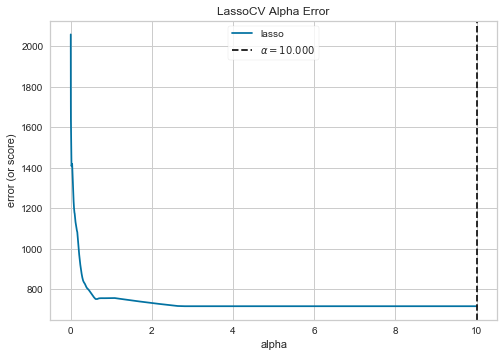

In [7]:
# 1st case:
# First case:
X1 = indepVarRain
y1 = depVar

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X1, y1)
visualizer.show()

In [ ]:
r2 = model.score(X3_test, y3_test)